Loaded documents: 4381
Raw TF-IDF shape: (4381, 5000)
After SVD shape: (4381, 2)


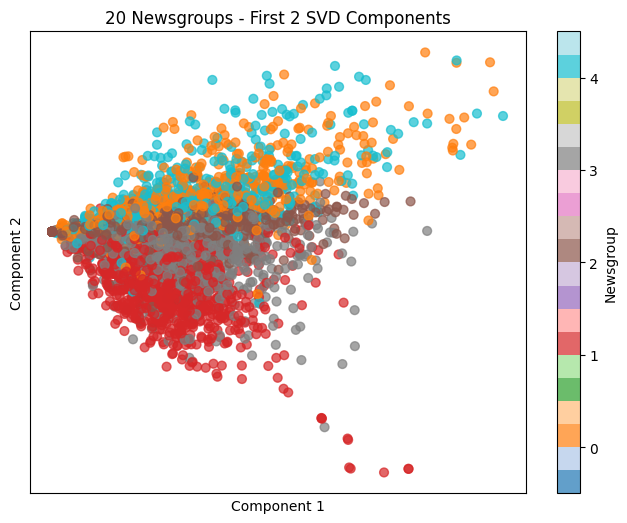

Silhouette Score with KMeans (k=20): 0.004517741269445981


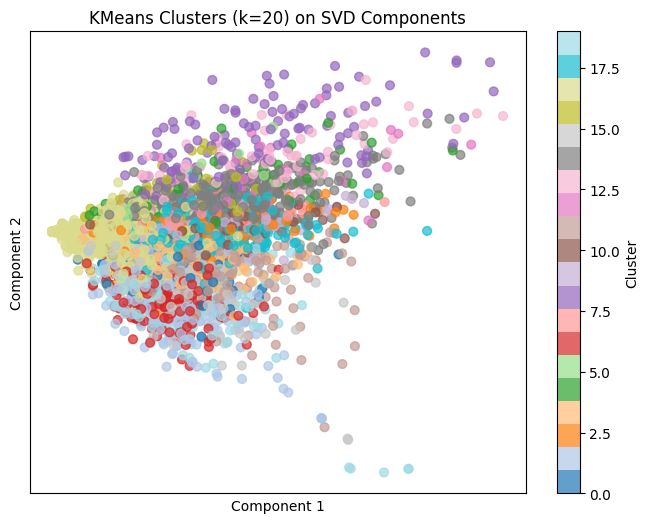

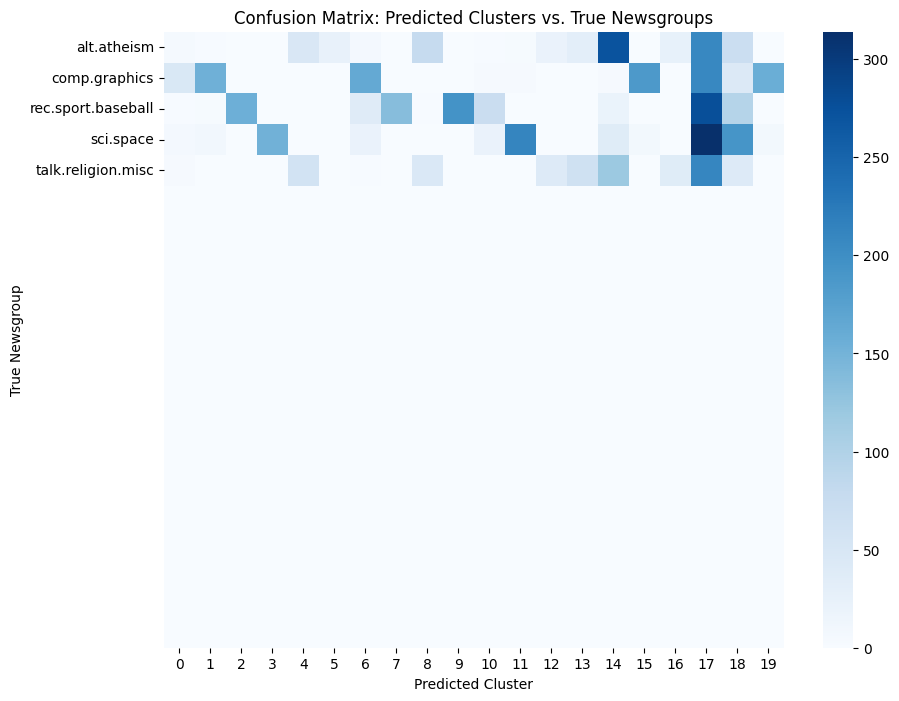

In [3]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO

# Loading the dataset
csv_data = """newsgroup,document_id
talk.religion.misc,82757
talk.religion.misc,82758
..."""
df = pd.read_csv(StringIO(csv_data))

# Loading text files
categories = ['talk.religion.misc', 'sci.space', 'comp.graphics', 'alt.atheism', 'rec.sport.baseball']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))
texts = newsgroups.data
labels_true = newsgroups.target
label_names = newsgroups.target_names
print("Loaded documents:", len(texts))

# Applying TF-IDF methods
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_tfidf = vectorizer.fit_transform(texts)
print("Raw TF-IDF shape:", X_tfidf.shape)

# Apply SVD for dimensionality reduction
svd = TruncatedSVD(n_components=2, random_state=42)
X_svd = svd.fit_transform(X_tfidf)
print("After SVD shape:", X_svd.shape)

# Ploting the first two components
plt.figure(figsize=(8, 6))
plt.scatter(X_svd[:, 0], X_svd[:, 1], c=labels_true, cmap='tab20', s=40, alpha=0.7)
plt.title("20 Newsgroups - First 2 SVD Components")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(ticks=range(len(label_names)), label='Newsgroup')
plt.clim(-0.5, len(label_names) - 0.5)
plt.gca().set_xticks([])  # Hide x-axis ticks for clarity
plt.gca().set_yticks([])  # Hide y-axis ticks for clarity
plt.show()

# Clustering when k=20
if X_tfidf.shape[0] >= 20:
    kmeans = KMeans(n_clusters=20, random_state=42, n_init=10)
    pred_labels = kmeans.fit_predict(X_tfidf)
    sil_score = silhouette_score(X_tfidf, pred_labels)
    print("Silhouette Score with KMeans (k=20):", sil_score)

    # Ploting clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X_svd[:, 0], X_svd[:, 1], c=pred_labels, cmap='tab20', s=40, alpha=0.7)
    plt.title("KMeans Clusters (k=20) on SVD Components")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.colorbar(label='Cluster')
    plt.gca().set_xticks([])  # Hide x-axis ticks for clarity
    plt.gca().set_yticks([])  # Hide y-axis ticks for clarity
    plt.show()

    # Confusion Matrix btw predicted and original clusters
    conf_matrix = confusion_matrix(labels_true, pred_labels)
    plt.figure(figsize=(10, 8))
    sns.heatmap(conf_matrix, annot=False, cmap='Blues', xticklabels=range(20), yticklabels=label_names)
    plt.title("Confusion Matrix: Predicted Clusters vs. True Newsgroups")
    plt.xlabel("Predicted Cluster")
    plt.ylabel("True Newsgroup")
    plt.show()
else:
    print("Not enough data points to perform KMeans clustering with 20 clusters.")